In [2]:
%load_ext autoreload
%autoreload 2

## 2. Data Understanding

## Load and Explore Dataset

Import the pandas and numpy package

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

Load the dataset into the dataframe
- train_df
- test_df

In [5]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

/var/folders/lk/qbgh0syd1l7_7h6ghvq233nr0000gn/T/ipykernel_645/3836542260.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/raw/train.csv')


In [6]:
train_df.iloc[:, 26].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: num, dtype: object

In [7]:
test_df.iloc[:, 26].head()

0    25.0
1     0.0
2    32.0
3    32.0
4     5.0
Name: num, dtype: float64

Column 26 is num, which is the Player Numbers.

In [8]:
train_df = pd.read_csv('../data/raw/train.csv', low_memory=False)
test_df = pd.read_csv('../data/raw/test.csv', low_memory=False)

Display the first few rows of the df

In [9]:
train_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [10]:
test_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,0,0,0.000,0,0,0.000,1,3,0.333,0.0,0.0,0.0,Sr,4-Jun,25.0,0.261536,91.8097,3.5,2021,all,NaN,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,106.4190,110.8410,0.655018,3.04099,-6.329190,-2.48656,-3.842620,-4.743390,10.0000,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,1,2,0.500,2,8,0.250,7,28,0.250,0.0,0.9,5.6,Sr,Jun-00,0.0,-1.110000,57.5491,2.8,2021,all,NaN,0.384583,2.0,4.0,0.0,4.0,0.5000,0.0000,0.0,0.0,NaN,NaN,110.1920,116.0180,0.450228,21.52420,-11.237600,-7.65745,-3.580200,-11.907200,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,14,32,0.438,33,59,0.559,0,2,0.000,9.0,1.7,52.5,Sr,9-Jun,32.0,0.662985,93.6716,5.5,2021,all,NaN,0.500000,26.0,37.0,7.0,22.0,0.7027,0.3182,9.0,10.0,0.9,NaN,99.2886,105.5980,1.706130,48.26240,-0.796603,-3.88882,3.092220,-1.207060,23.3333,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,0,0,0.000,1,2,0.500,1,1,1.000,0.0,0.0,0.0,Sr,2-Jun,32.0,0.135373,102.3240,5.0,2021,all,NaN,0.000000,0.0,0.0,1.0,2.0,NaN,0.5000,0.0,0.0,NaN,NaN,100.4870,95.3504,0.253055,2.53301,-1.802590,-1.15052,-0.652075,0.194558,2.2857,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,31,36,0.861,62,129,0.481,58,147,0.395,0.3,1.4,13.0,Sr,4-Jun,5.0,2.977030,111.4260,3.5,2021,all,92.8,0.586950,14.0,26.0,48.0,103.0,0.5385,0.4660,0.0,0.0,NaN,NaN,111.7920,104.3060,2.610670,114.53100,1.064440,2.41992,-1.355480,1.874610,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360


Display the dimension (shape) of df

In [11]:
train_df.shape

(56091, 64)

In [12]:
test_df.shape

(4970, 63)

Display the summary (info) of df

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

Display the descriptive statistics of df

In [15]:
train_df.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,17036.000000,51901.000000,50010.000000,50010.000000,50010.000000,50010.000000,46627.000000,46403.000000,50010.000000,50010.000000,25298.000000,1386.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56053.000000,56047.000000,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091.000000
mean,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,10.848740,20.337819,32.926708,47.152627,0.579696,41.412401,85.319160,0.426941,15.677613,45.616480,0.227449,1.876426,1.715305,37.437150,0.775720,89.328297,4.242936,2014.536557,53.456363,0.932305,28.066087,47.052490,14.494741,40.523115,0.564080,0.323633,3.836553,4.311618,0.863570,33.254690,103.319021,103.476636,1.438807,82.827595,-2.525068,-1.896939,-0.628129,-2.525672,16.973259,-2.083375,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,0.009556
std,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,9.356001,12.226129,36.870041,49.557538,0.268678,43.730858,85.130054,0.193498,21.584619,58.060609,0.190430,5.876399,2.080477,36.813143,1.333574,30.923798,4.610406,3.450911,27.641745,0.696625,30.144876,47.582825,17.538837,44.401559,0.190824,0.171453,7.943541,8.709568,0.230396,16.651343,10.163752,11.033215,1.064868,65.344533,7.586977,5.184468,4.280805,8.304955,10.623801,6.190166,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,0.097287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.792410,-39.021300,0.000000,2009.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-102.186000,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,4.600000,14.800000,4.000000,7.000000,0.500000,5.000000,13.000000,0.375000,0.000000,1.000000,0.000000,0.000000,0.900000,19.400000,-0.170944,79.383600,2.800000,2012.000000,30.600000,0.459428,4.000000,8.000000,2.000000,6.000000,0.500000,0.250000,0.000000,0.000000,0.818200,20.000000,99.013850,98.083800,0.525770,19.846900,-5.377530,-3.986970,-2.285125,-5.379030,7.307700,-4.426515,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,0.000000
50%,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,9.100000,19.100000,20.000000,31.000000,0.660000,27.000000,60.000000,0.460000,5.000000,18.000000,0.275000,0.800000,1.500000,32.800000,0.390392,94.648900,3.800000,2015.000000,55.400000,0.822562,18.000000,33.000000,8.000000,25.000000,0.580600,0.333300,0.000000,1.000000,1.000000,34.000000,103.671000,103.827000,1.266370,76.607600,-1.817550,-1.333140,-0.576564,-1.788120,16.714300,-1.580380,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,0.000000
75%,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,15.100000,24.500000,50.000000,72.000000,0.755

In [16]:
test_df.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,num,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4874.000000,4970.000000,4970.000000,4970.000000,4970.0,1434.000000,4433.000000,4722.000000,4722.000000,4722.000000,4722.000000,4324.000000,4273.000000,4722.000000,4722.000000,2253.000000,49.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4970.000000,4969.000000,4969.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000
mean,15.865795,34.906881,89.500644,17.867626,43.657203,46.538342,5.168390,13.048753,10.356801,18.962254,20.459155,28.808249,0.557733,28.559155,57.394165,0.423934,11.578672,34.253320,0.228245,1.755795,1.709336,32.334547,15.050267,0.740874,86.986198,3.957203,2021.0,54.735007,0.986900,20.114147,34.002118,9.928420,26.359170,0.557162,0.341192,2.720246,3.096569,0.856052,30.591837,102.701310,102.764251,1.411658,58.310243,-2.699018,-1.978942,-0.720076,-2.675349,16.569559,-2.149284,-0.526065,0.697025,1.953592,2.650609,1.069840,0.529118,0.260375,5.753262
std,8.276655,27.921356,35.338827,6.780159,20.716630,19.992005,7.030561,9.248595,9.427192,13.255566,24.086666,32.064097,0.304797,32.348485,61.905031,0.219063,15.658638,42.533025,0.193004,3.159920,2.669430,34.581884,12.675128,1.328677,35.634018,3.146791,0.0,26.539638,0.736819,22.605377,35.853871,12.915476,31.311422,0.203258,0.199338,5.793770,6.407538,0.236670,16.824979,9.010928,10.036087,1.065580,50.570677,7.562040,5.428728,3.921998,9.219343,10.550727,6.750792,3.920493,0.683636,1.533018,2.073589,1.153074,0.474838,0.380465,4.881835
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.057160,-32.658900,0.000000,2021.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-71.060100,-66.130100,-0.314065,0.049147,-53.994300,-45.473100,-28.868900,-91.930200,0.250000,-62.101300,-31.594500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,6.700000,80.900000,14.200000,38.400000,42.340000,1.400000,8.400000,4.300000,13.100000,2.000000,3.000000,0.455000,3.000000,7.000000,0.354000,0.000000,1.000000,0.000000,0.000000,0.700000,14.125000,4.000000,-0.214476,77.030950,2.500000,2021.0,33.200000,0.500000,3.000000,5.000000,1.000000,3.000000,0.482800,0.250000,0.000000,0.000000,0.800000,17.000000,98.608100,97.310200,0.488493,10.163500,-5.642250,-4.028530,-2.352610,-5.700980,6.891675,-4.443960,-1.868180,0.200000,0.750000,1.000000,0.250000,0.142900,0.000000,1.602175
50%,17.000000,32.350000,96.800000,18.000000,48.100000,50.850000,3.700000,12.300000,8.600000,18.100000,12.000000,18.000000,0.663000,17.000000,37.000000,0.471000,4.000000,16.000000,0.273000,0.800000,1.500000,27.300000,12.000000,0.397186,94.163250,3.500000,2021.0,57.700000,0.888889,12.000000,23.000000,5.000000,15.000000,0.572600,0.348300,0.000000,0.000000,1.000000,30.000000,102.971000,102.981000,1.218150,49.415400,-1.864300,-1.302320,-0.652638,-1.757890,16.083350,-1.540360,-0.397400,0.500000,1.666700,2.260900,0.680000,0.428600,0.133300,4.535900
75%,22.000000,59.900000,107.100000,21.800000,54.000000,56.780000,7.400000,16.800000,14.500000,23.400000,31.000000,45.000000,0.769000,44.000000,89.000000,0.543000,18.000000,56.000000,0.356000,2.300000,2.200000,41.775000,23.000000,1.4

Display the missing values in the df

In [17]:
train_df.isna().sum()

team                       0
conf                       0
GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
stl_per                    0
ftr                        0
yr                       292
ht                        98
num                     4690
porpag                     0
adjoe                      0
pfr                        0
year                       0
type                       0
Rec_Rank               39055
ast_tov                 4190
rimmade       

In [18]:
test_df.isna().sum()

team                      0
conf                      0
GP                        0
Min_per                   0
Ortg                      0
usg                       0
eFG                       0
TS_per                    0
ORB_per                   0
DRB_per                   0
AST_per                   0
TO_per                    0
FTM                       0
FTA                       0
FT_per                    0
twoPM                     0
twoPA                     0
twoP_per                  0
TPM                       0
TPA                       0
TP_per                    0
blk_per                   0
stl_per                   0
ftr                       0
yr                        2
ht                       13
num                      96
porpag                    0
adjoe                     0
pfr                       0
year                      0
type                      0
Rec_Rank               3536
ast_tov                 537
rimmade                 248
rimmade_rimmiss     

In [19]:
train_df.duplicated().sum()

0

In [20]:
test_df.duplicated().sum()

0

In [21]:
train_df['drafted'].value_counts(normalize=True)

drafted
0.0    0.990444
1.0    0.009556
Name: proportion, dtype: float64

## 3.Data Preparation

Create a copy of df and assigned it into a variable called df_cleaned

In [22]:
df_cleaned_train = train_df.copy()

In [23]:
df_cleaned_test = test_df.copy()

We will categorize our data in two types: categorical and numerical columns. This distinction will help us apply appropriate preprocessing techniques to each type of data.

In [24]:
import missingno as msno

<Axes: >

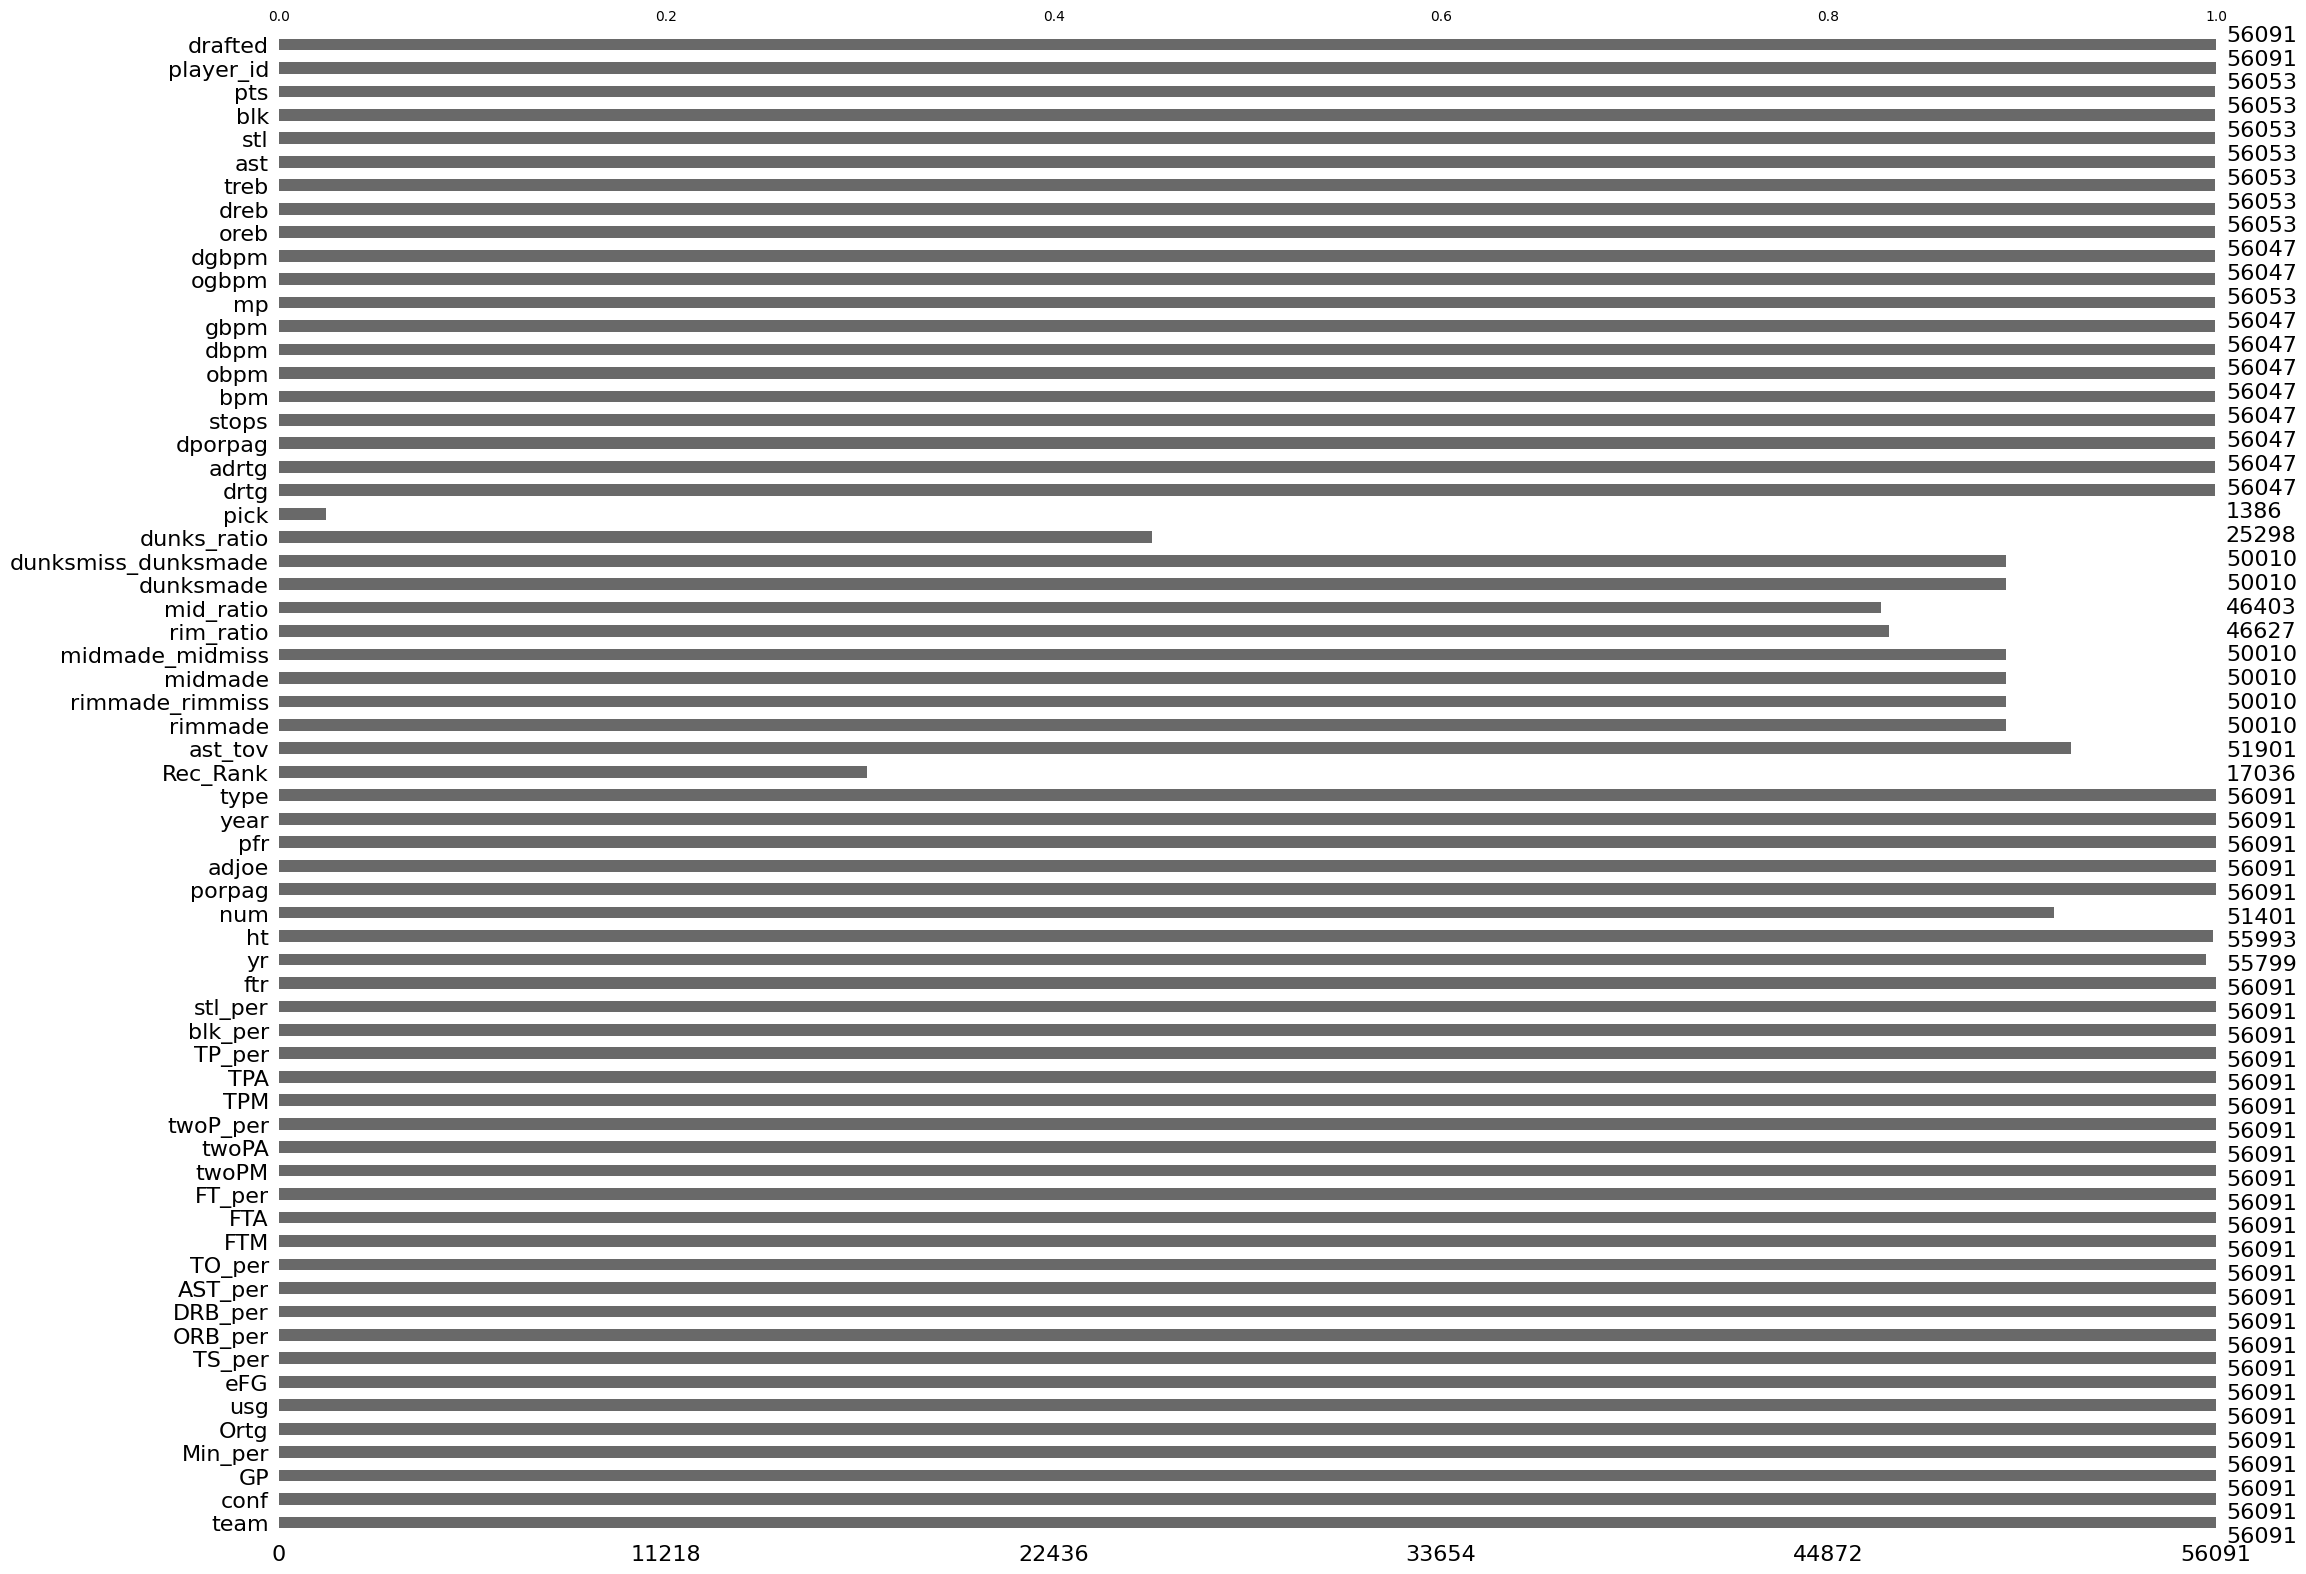

In [26]:
msno.bar(df_cleaned_train)

<Axes: >

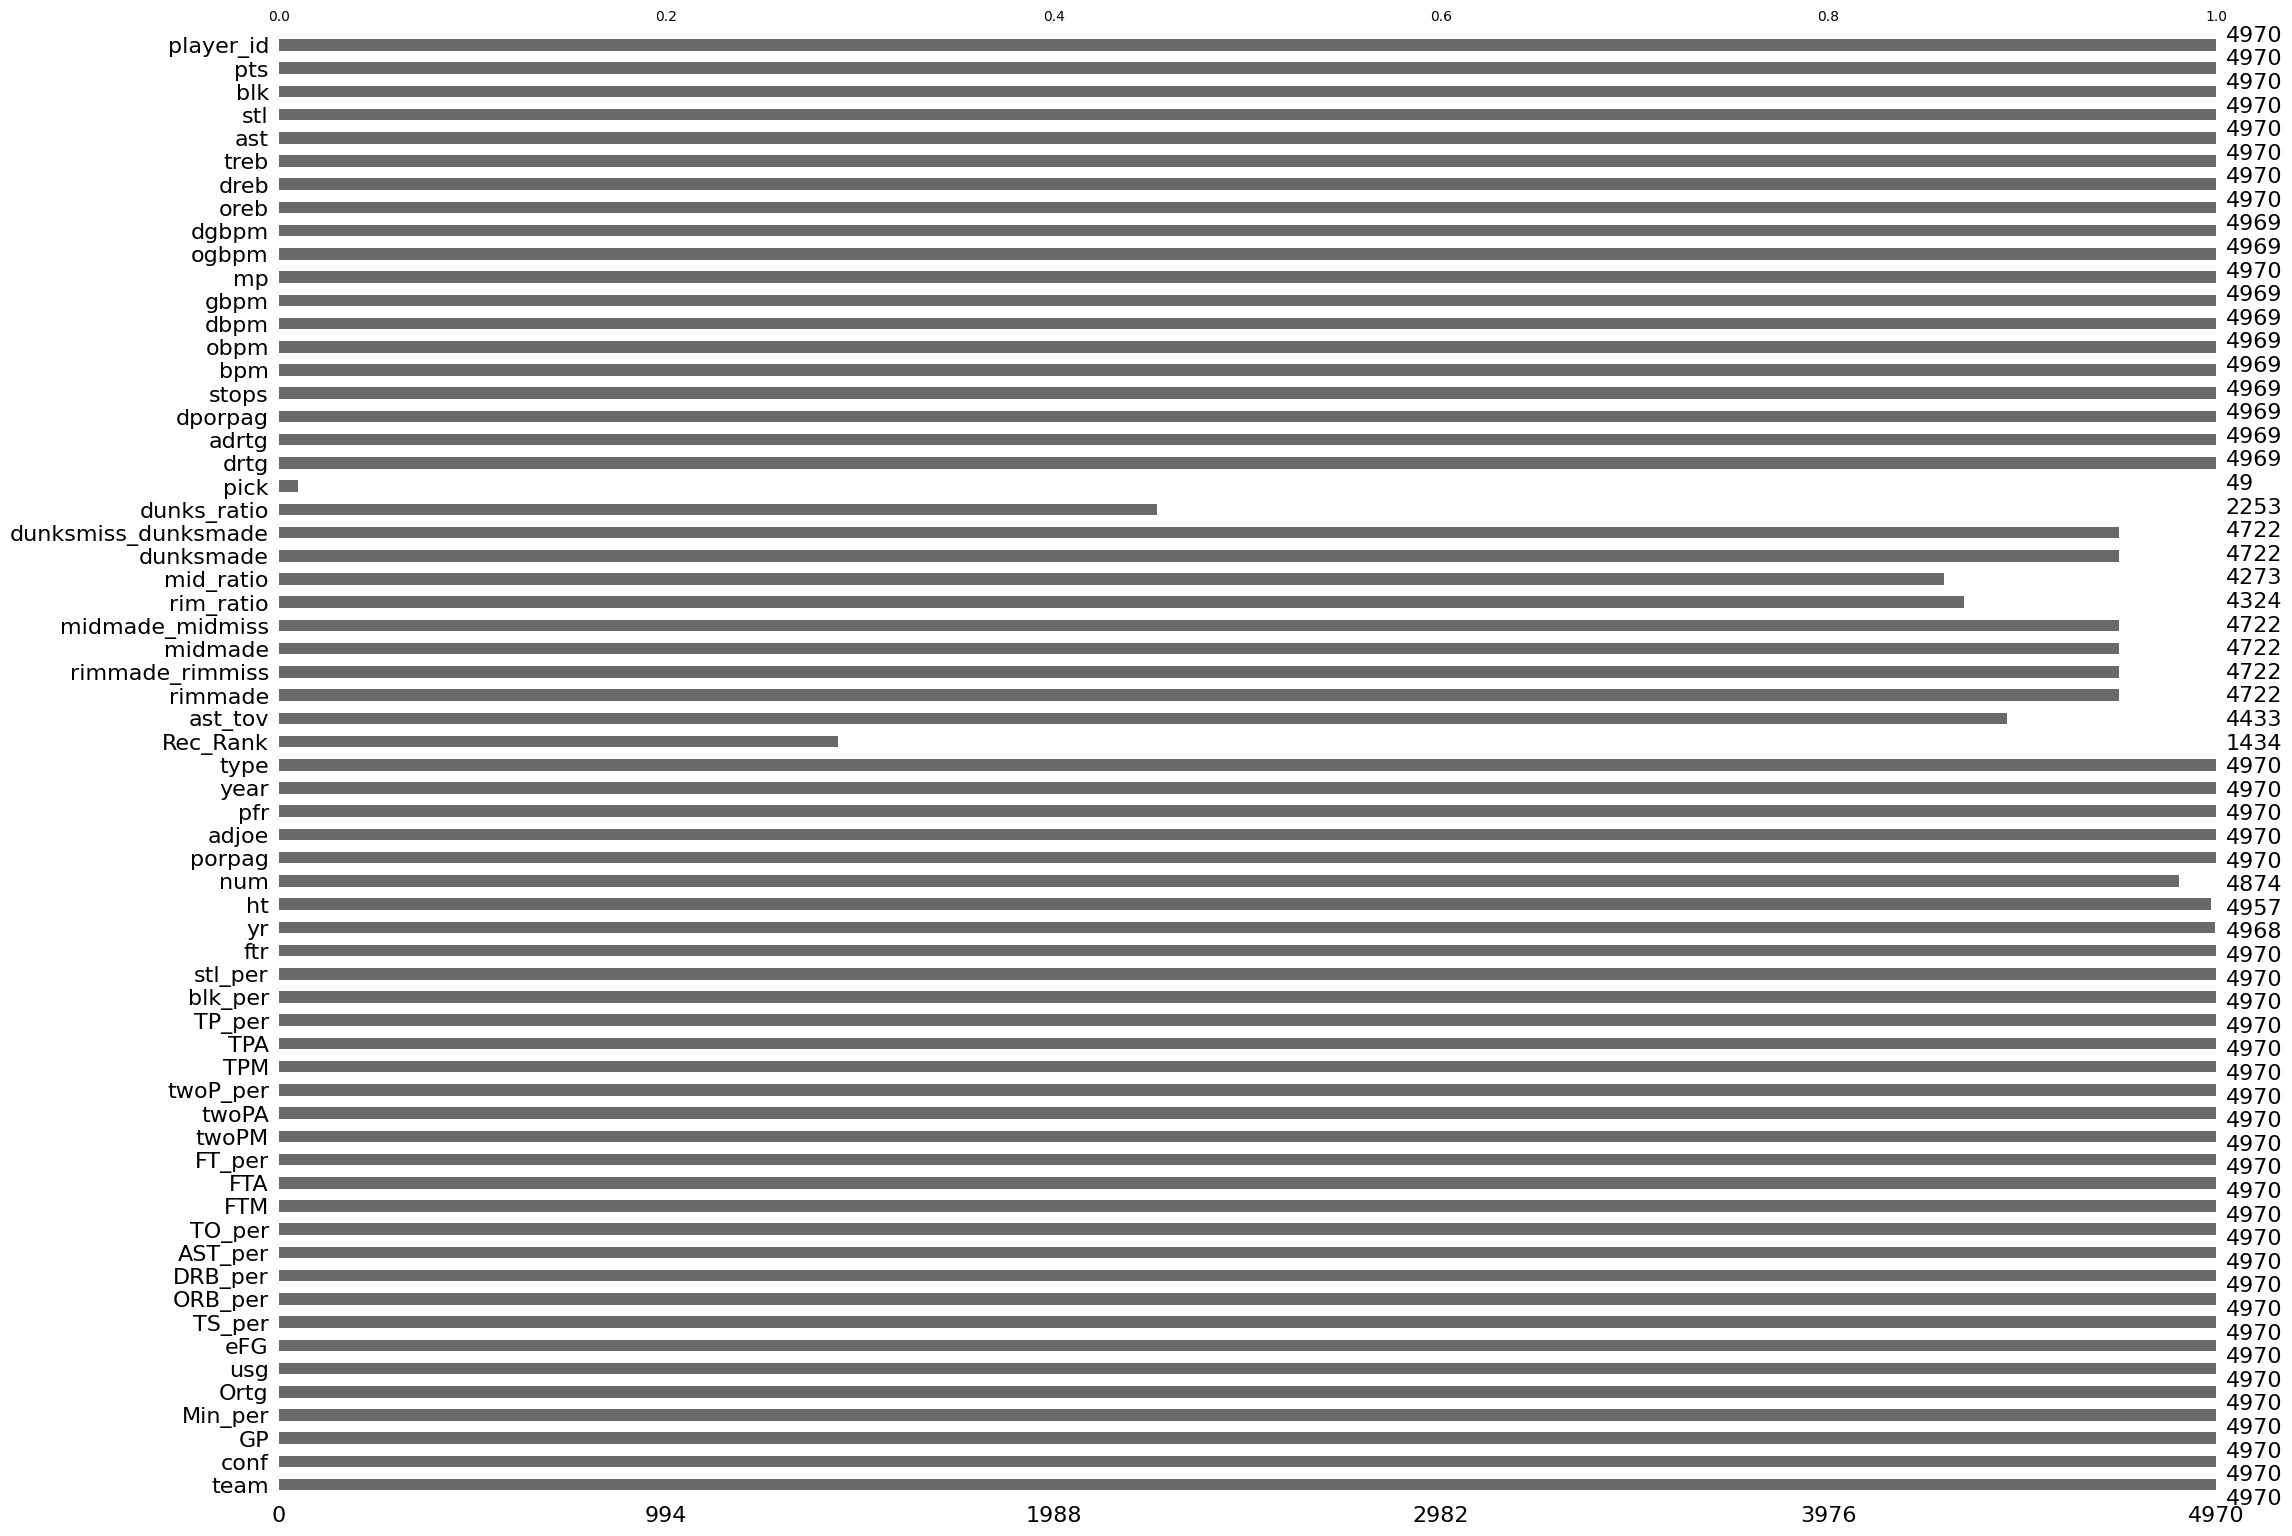

In [27]:
msno.bar(df_cleaned_test)

<Axes: >

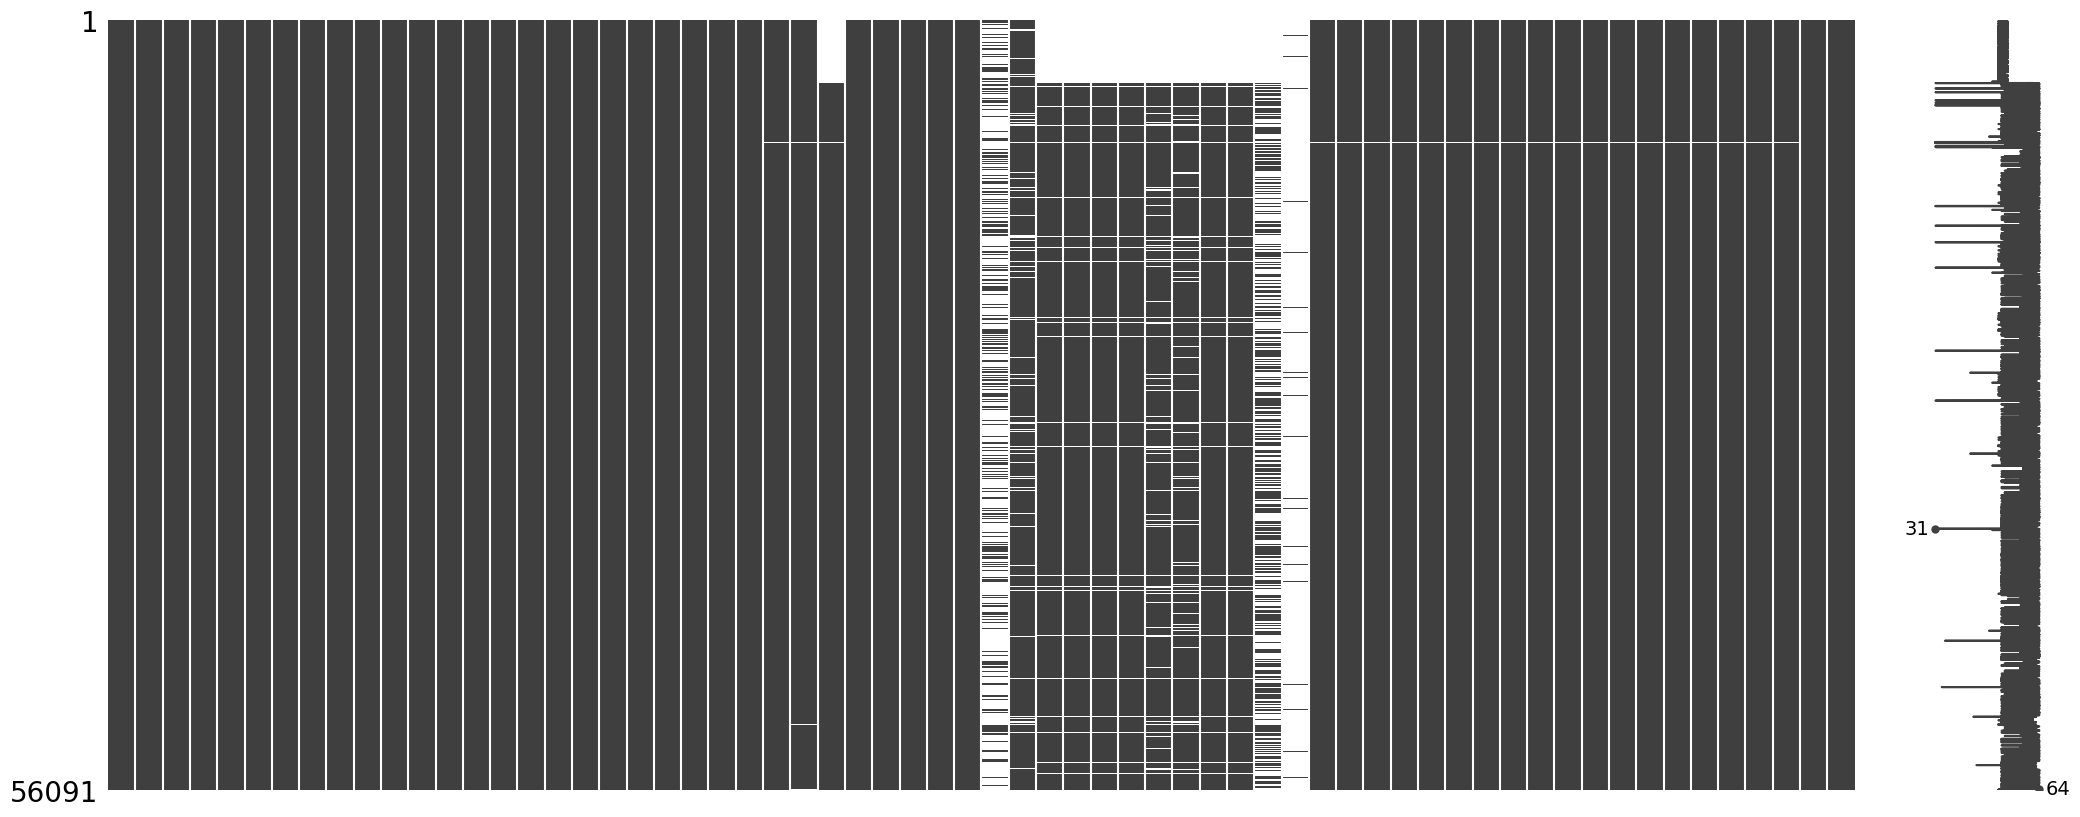

In [28]:
msno.matrix(df_cleaned_train)

<Axes: >

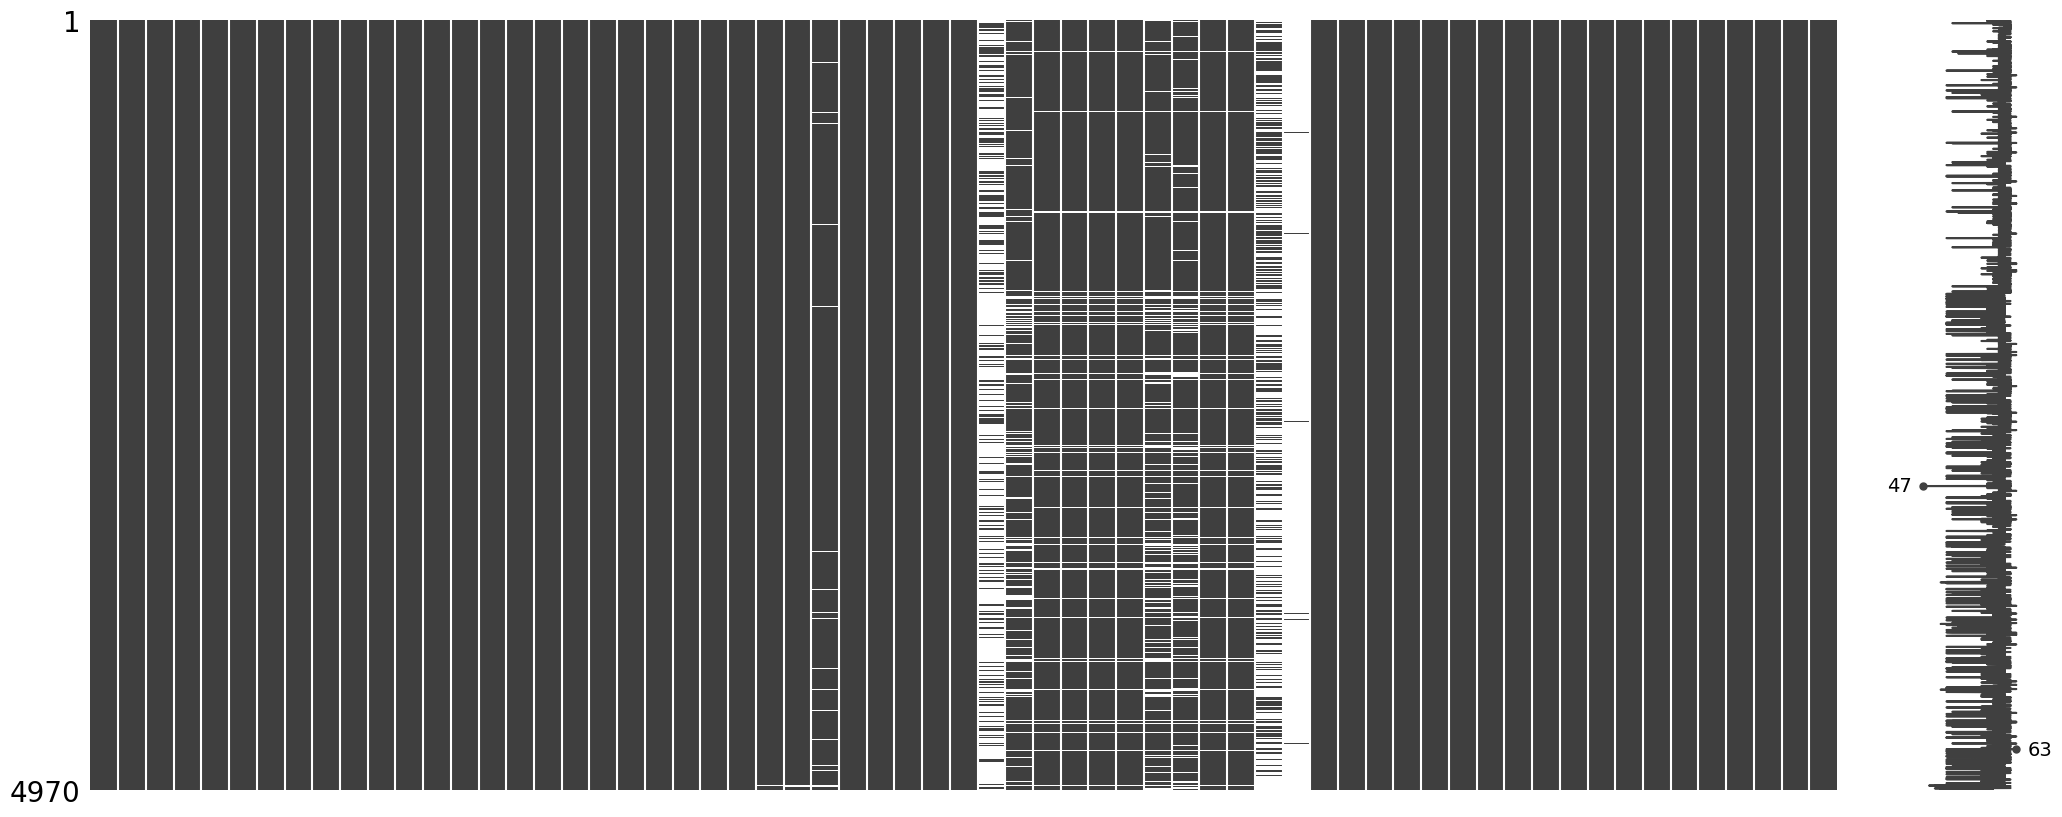

In [29]:
msno.matrix(df_cleaned_test)

#### Large Number of Missing

- 'Rec_Rank'
- 'dunks_ratio'
- 'pick'

In [25]:
df_cleaned_train.drop(columns=['Rec_Rank', 'dunks_ratio', 'pick'], inplace=True)

In [26]:
df_cleaned_test.drop(columns=['Rec_Rank', 'dunks_ratio', 'pick'], inplace=True)

#### Missing Data Pattern

The below column appears to have a missing value with pattern.
- rimmade
- rimmade_rimmiss
- midmade
- midmade_midmiss
- dunksmade
- dunksmiss_dunksmade

### Categorical Columns

We will extract the categorical columns from our df.

In [27]:
cat_cols = [feature for feature in df_cleaned_train.columns if df_cleaned_train[feature].dtypes=='O']

In [28]:
num_cols = [feature for feature in df_cleaned_train.columns if df_cleaned_train[feature].dtypes!='O']

In [29]:
cat_cols

['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id']

The following columns fall under the categorical category:

- **team:** Name of team
- **conf:** Name of conference
- **yr:** Student’s year of study: `Fr` for freshmen, `So` for sophomores, `Jr` for juniors, `Sr` for seniors
- **ht:** Height of student
- **num:** Player's number
- **type:** Type of metrics displayed: `All` for all types, `C` for conference`, `NC` for non-conference, `PC` for pre-conference tour, `R` for regular season, `P` for post-season, `T` for NCAA
- **player_id:** Unique identifier of player.


In [30]:
for i in cat_cols:
    print(f"{i}: {df_cleaned_train[i].nunique()}")

team: 358
conf: 36
yr: 7
ht: 38
num: 79
type: 1
player_id: 23929


In [31]:
for i in cat_cols:
    print(f"{i}: {df_cleaned_test[i].nunique()}")

team: 347
conf: 31
yr: 4
ht: 24
num: 36
type: 1
player_id: 4970


Import matplotlib and seaborn

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
palette = 'ch:.25'

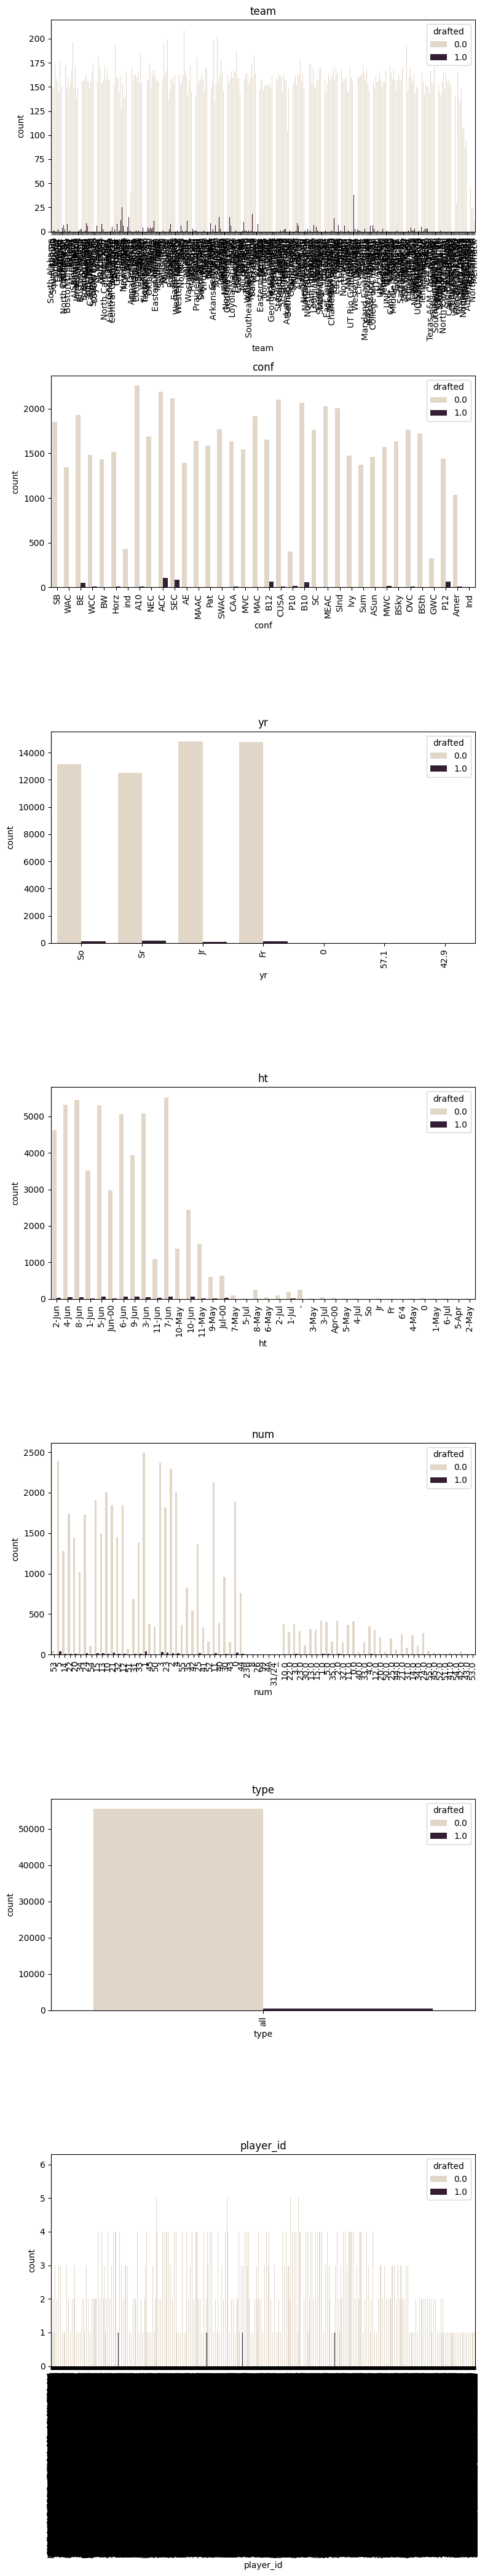

In [39]:
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(8, 6 * len(cat_cols)))

for i, (c, ax) in enumerate(zip(cat_cols, axes)):
    sns.countplot(x=c, data=train_df, ax=ax, palette=palette, hue='drafted')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(c)
    
plt.tight_layout()
plt.show()

- **team:** There are 358 uniques team.
- **conf:** There are 36 unique conference.
- **yr:** The year column should be an ordinal type which contain four different year of student.
- **ht:** The height of student contains a mix data type.
- **num:** There are some special number that need to be convert.
- **type:** There was only one unique value in this column.
- **player_id:** There are 23929 unique player in our dataset.


We will perform the following steps for categorical columns:

1. **One-Hot Encoding:** We'll perform one hot encoding on 'conf' columns.
2. **Hash-Encoding:** We'll perform hash encoding on 'team' columns.
3. **Ordianal Mapping:** We'll convert the ordinal category into numerical values, mapping `Fr` to 1, `So` to 2, `Jr` to 3, and `Sr` to 4.
4. **Drop some columns:** 'ht' column will be drop, since the height column contain mixed data type and didn't provide any useful information. 'type' and 'player_id' will also be dropped, since 'type' column has only one unique value and 'player_id' column is a unique identifier for each player.

5. **Other Technique:**

#### One-hot encoding

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe_cols = ['conf']

ohe = OneHotEncoder(sparse_output=False, drop='first')

In [36]:
features = ohe.fit_transform(df_cleaned_train[ohe_cols])
features = pd.DataFrame(features, columns=ohe.get_feature_names_out())

In [37]:
df_cleaned_train.drop(columns=['conf'], inplace=True)

In [38]:
df_cleaned_train = pd.concat([features, df_cleaned_train], axis=1)

In [39]:
df_cleaned_train.head()

,conf_ACC,conf_AE,conf_ASun,conf_Amer,conf_B10,conf_B12,conf_BE,conf_BSky,conf_BSth,conf_BW,conf_CAA,conf_CUSA,conf_GWC,conf_Horz,conf_Ind,conf_Ivy,conf_MAAC,conf_MAC,conf_MEAC,conf_MVC,conf_MWC,conf_NEC,conf_OVC,conf_P10,conf_P12,conf_Pat,conf_SB,conf_SC,conf_SEC,conf_SWAC,conf_Slnd,conf_Sum,conf_WAC,conf_WCC,conf_ind,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,South Alabama,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Utah St.,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,South Florida,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Pepperdine,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pacific,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [40]:
features = ohe.fit_transform(df_cleaned_test[ohe_cols])
features = pd.DataFrame(features, columns=ohe.get_feature_names_out())

In [41]:
df_cleaned_test.drop(columns=['conf'], inplace=True)

In [42]:
df_cleaned_test = pd.concat([features, df_cleaned_test], axis=1)

In [43]:
df_cleaned_test.head()

,conf_ACC,conf_AE,conf_ASun,conf_Amer,conf_B10,conf_B12,conf_BE,conf_BSky,conf_BSth,conf_BW,conf_CAA,conf_CUSA,conf_Horz,conf_MAAC,conf_MAC,conf_MEAC,conf_MVC,conf_MWC,conf_NEC,conf_OVC,conf_P12,conf_Pat,conf_SB,conf_SC,conf_SEC,conf_SWAC,conf_Slnd,conf_Sum,conf_WAC,conf_WCC,team,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Morgan St.,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,0,0,0.000,0,0,0.000,1,3,0.333,0.0,0.0,0.0,Sr,4-Jun,25.0,0.261536,91.8097,3.5,2021,all,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,106.4190,110.8410,0.655018,3.04099,-6.329190,-2.48656,-3.842620,-4.743390,10.0000,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,South Carolina St.,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,1,2,0.500,2,8,0.250,7,28,0.250,0.0,0.9,5.6,Sr,Jun-00,0.0,-1.110000,57.5491,2.8,2021,all,0.384583,2.0,4.0,0.0,4.0,0.5000,0.0000,0.0,0.0,110.1920,116.0180,0.450228,21.52420,-11.237600,-7.65745,-3.580200,-11.907200,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Binghamton,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,14,32,0.438,33,59,0.559,0,2,0.000,9.0,1.7,52.5,Sr,9-Jun,32.0,0.662985,93.6716,5.5,2021,all,0.500000,26.0,37.0,7.0,22.0,0.7027,0.3182,9.0,10.0,99.2886,105.5980,1.706130,48.26240,-0.796603,-3.88882,3.092220,-1.207060,23.3333,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Illinois,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,0,0,0.000,1,2,0.500,1,1,1.000,0.0,0.0,0.0,Sr,2-Jun,32.0,0.135373,102.3240,5.0,2021,all,0.000000,0.0,0.0,1.0,2.0,NaN,0.5000,0.0,0.0,100.4870,95.3504,0.253055,2.53301,-1.802590,-1.15052,-0.652075,0.194558,2.2857,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iowa St.,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,31,36,0.861,62,129,0.481,58,147,0.395,0.3,1.4,13.0,Sr,4-Jun,5.0,2.977030,111.4260,3.5,2021,all,0.586950,14.0,26.0,48.0,103.0,0.5385,0.4660,0.0,0.0,111.7920,104.3060,2.610670,114.53100,1.064440,2.41992,-1.355480,1.874610,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360


In [44]:
def handle_missing_columns(df_train, df_test):
    missing_columns = set(df_train.columns) - set(df_test.columns)
    
    cols_to_remove = missing_columns - {'drafted'}
    
    df_train.drop(columns=cols_to_remove, inplace=True)
    
    return df_train

In [45]:
df_cleaned_train = handle_missing_columns(df_cleaned_train, df_cleaned_test)

In [46]:
df_cleaned_train.shape

(56091, 90)

In [47]:
df_cleaned_test.shape

(4970, 89)

#### Hash Encoder

In [48]:
import category_encoders as ce

In [49]:
encoder=ce.HashingEncoder(cols='team', n_components=10)

In [50]:
df_cleaned_train = encoder.fit_transform(df_cleaned_train)
df_cleaned_test = encoder.fit_transform(df_cleaned_test)

#### Ordinal Mapping

In [51]:
df_cleaned_train['yr'].isna().sum()

292

In [52]:
yr_mode_train = df_cleaned_train['yr'].mode()[0]

In [53]:
yr_mode_train

'Jr'

In [54]:
df_cleaned_train['yr'].fillna(yr_mode_train, inplace=True)

In [55]:
df_cleaned_test['yr'].isna().sum()

2

In [56]:
df_cleaned_test['yr'].fillna(yr_mode_train, inplace=True)

In [57]:
df_cleaned_train['yr'].value_counts()

yr
Jr      15215
Fr      14906
So      13252
Sr      12711
0           5
57.1        1
42.9        1
Name: count, dtype: int64

In [58]:
df_cleaned_test['yr'].value_counts()

yr
Fr    1327
Jr    1320
So    1233
Sr    1090
Name: count, dtype: int64

The 'yr' columns represent the student year's of study:
- Jr: Junoirs
- Fr: Freshmen
- So: Sophomores
- Sr: Seniors

There are some mixture of numerics data types, and in this case, we will filter out the rows that don't belong in these categories.

In [59]:
values_to_drop = ['0', '57.1', '42.9']

df_cleaned_train = df_cleaned_train[~df_cleaned_train['yr'].isin(values_to_drop)]

In [60]:
yr_mapping = {
    'Fr': 1,
    'So': 2,
    'Jr': 3,
    'Sr': 4
}

In [61]:
df_cleaned_train['yr'] = df_cleaned_train['yr'].map(yr_mapping)

In [62]:
df_cleaned_test['yr'] = df_cleaned_test['yr'].map(yr_mapping)

#### Drop 'type', 'ht', and 'player_id'

In [63]:
df_cleaned_train['ht'].value_counts()

ht
7-Jun     5578
8-Jun     5497
4-Jun     5363
5-Jun     5353
6-Jun     5126
3-Jun     5124
2-Jun     4648
9-Jun     3988
1-Jun     3538
Jun-00    2984
10-Jun    2491
11-May    1518
10-May    1378
11-Jun    1119
Jul-00     653
9-May      598
8-May      242
-          241
1-Jul      201
7-May       95
2-Jul       88
6-May       40
3-Jul       40
Apr-00      20
0           19
4-Jul       11
5-May        8
6-Jul        7
4-May        4
5-Jul        4
3-May        3
2-May        3
1-May        2
6'4          1
5-Apr        1
Name: count, dtype: int64

In [64]:
df_cleaned_test['ht'].value_counts()

ht
5-Jun     533
7-Jun     504
4-Jun     486
6-Jun     481
3-Jun     469
8-Jun     463
2-Jun     385
9-Jun     373
1-Jun     291
10-Jun    260
Jun-00    258
11-Jun    110
11-May     96
10-May     80
Jul-00     72
1-Jul      27
9-May      25
8-May      16
7-May       8
2-Jul       6
3-Jul       5
6-May       5
4-Jul       3
2-May       1
Name: count, dtype: int64

In [65]:
df_cleaned_train.drop(columns=['type', 'player_id', 'ht'], inplace=True)

In [66]:
df_cleaned_test.drop(columns=['type', 'player_id', 'ht'], inplace=True)

#### Label Encoding on 'num'

In [67]:
df_cleaned_train['num'].isna().sum()

4683

In [68]:
df_cleaned_test['num'].isna().sum()

96

In [69]:
df_cleaned_train['num'].dtype

dtype('O')

In [70]:
df_cleaned_test['num'].dtype

dtype('float64')

In [71]:
df_cleaned_train['num'] = df_cleaned_train['num'].astype(str)
df_cleaned_test['num'] = df_cleaned_test['num'].astype(str)

In [72]:
special_case = {'--': '0', '31/24': '31', '23B': '23', '4A': '4'}
df_cleaned_train['num'] = df_cleaned_train['num'].replace(special_case)

In [73]:
df_cleaned_train['num'] = df_cleaned_train['num'].str.split('.').str[0]
df_cleaned_test['num'] = df_cleaned_test['num'].str.split('.').str[0]

In [74]:
encoded_num = pd.get_dummies(df_cleaned_train['num'], prefix='num')
encoded_num = encoded_num.astype(int)

In [75]:
df_cleaned_train = pd.concat([df_cleaned_train, encoded_num], axis=1)
df_cleaned_train.drop(columns=['num'], inplace=True)

In [76]:
encoded_num = pd.get_dummies(df_cleaned_test['num'], prefix='num')
encoded_num = encoded_num.astype(int)

In [77]:
df_cleaned_test = pd.concat([df_cleaned_test, encoded_num], axis=1)
df_cleaned_test.drop(columns=['num'], inplace=True)

In [78]:
df_cleaned_train.shape

(56084, 135)

In [79]:
df_cleaned_test.shape

(4970, 131)

In [80]:
df_cleaned_train = handle_missing_columns(df_cleaned_train, df_cleaned_test)

In [81]:
df_cleaned_train.isna().sum()

col_0                     0
col_1                     0
col_2                     0
col_3                     0
col_4                     0
col_5                     0
col_6                     0
col_7                     0
col_8                     0
col_9                     0
conf_ACC                  0
conf_AE                   0
conf_ASun                 0
conf_Amer                 0
conf_B10                  0
conf_B12                  0
conf_BE                   0
conf_BSky                 0
conf_BSth                 0
conf_BW                   0
conf_CAA                  0
conf_CUSA                 0
conf_Horz                 0
conf_MAAC                 0
conf_MAC                  0
conf_MEAC                 0
conf_MVC                  0
conf_MWC                  0
conf_NEC                  0
conf_OVC                  0
conf_P12                  0
conf_Pat                  0
conf_SB                   0
conf_SC                   0
conf_SEC                  0
conf_SWAC           

In [82]:
df_cleaned_test.isna().sum()

col_0                    0
col_1                    0
col_2                    0
col_3                    0
col_4                    0
col_5                    0
col_6                    0
col_7                    0
col_8                    0
col_9                    0
conf_ACC                 0
conf_AE                  0
conf_ASun                0
conf_Amer                0
conf_B10                 0
conf_B12                 0
conf_BE                  0
conf_BSky                0
conf_BSth                0
conf_BW                  0
conf_CAA                 0
conf_CUSA                0
conf_Horz                0
conf_MAAC                0
conf_MAC                 0
conf_MEAC                0
conf_MVC                 0
conf_MWC                 0
conf_NEC                 0
conf_OVC                 0
conf_P12                 0
conf_Pat                 0
conf_SB                  0
conf_SC                  0
conf_SEC                 0
conf_SWAC                0
conf_Slnd                0
c

### Numerical Columns

In [83]:
num_cols

['GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'TS_per',
 'ORB_per',
 'DRB_per',
 'AST_per',
 'TO_per',
 'FTM',
 'FTA',
 'FT_per',
 'twoPM',
 'twoPA',
 'twoP_per',
 'TPM',
 'TPA',
 'TP_per',
 'blk_per',
 'stl_per',
 'ftr',
 'porpag',
 'adjoe',
 'pfr',
 'year',
 'ast_tov',
 'rimmade',
 'rimmade_rimmiss',
 'midmade',
 'midmade_midmiss',
 'rim_ratio',
 'mid_ratio',
 'dunksmade',
 'dunksmiss_dunksmade',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts',
 'drafted']

In [84]:
missing_columns = df_cleaned_train.columns[df_cleaned_train.isna().any()].tolist()
missing_columns

['ast_tov',
 'rimmade',
 'rimmade_rimmiss',
 'midmade',
 'midmade_midmiss',
 'rim_ratio',
 'mid_ratio',
 'dunksmade',
 'dunksmiss_dunksmade',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts']

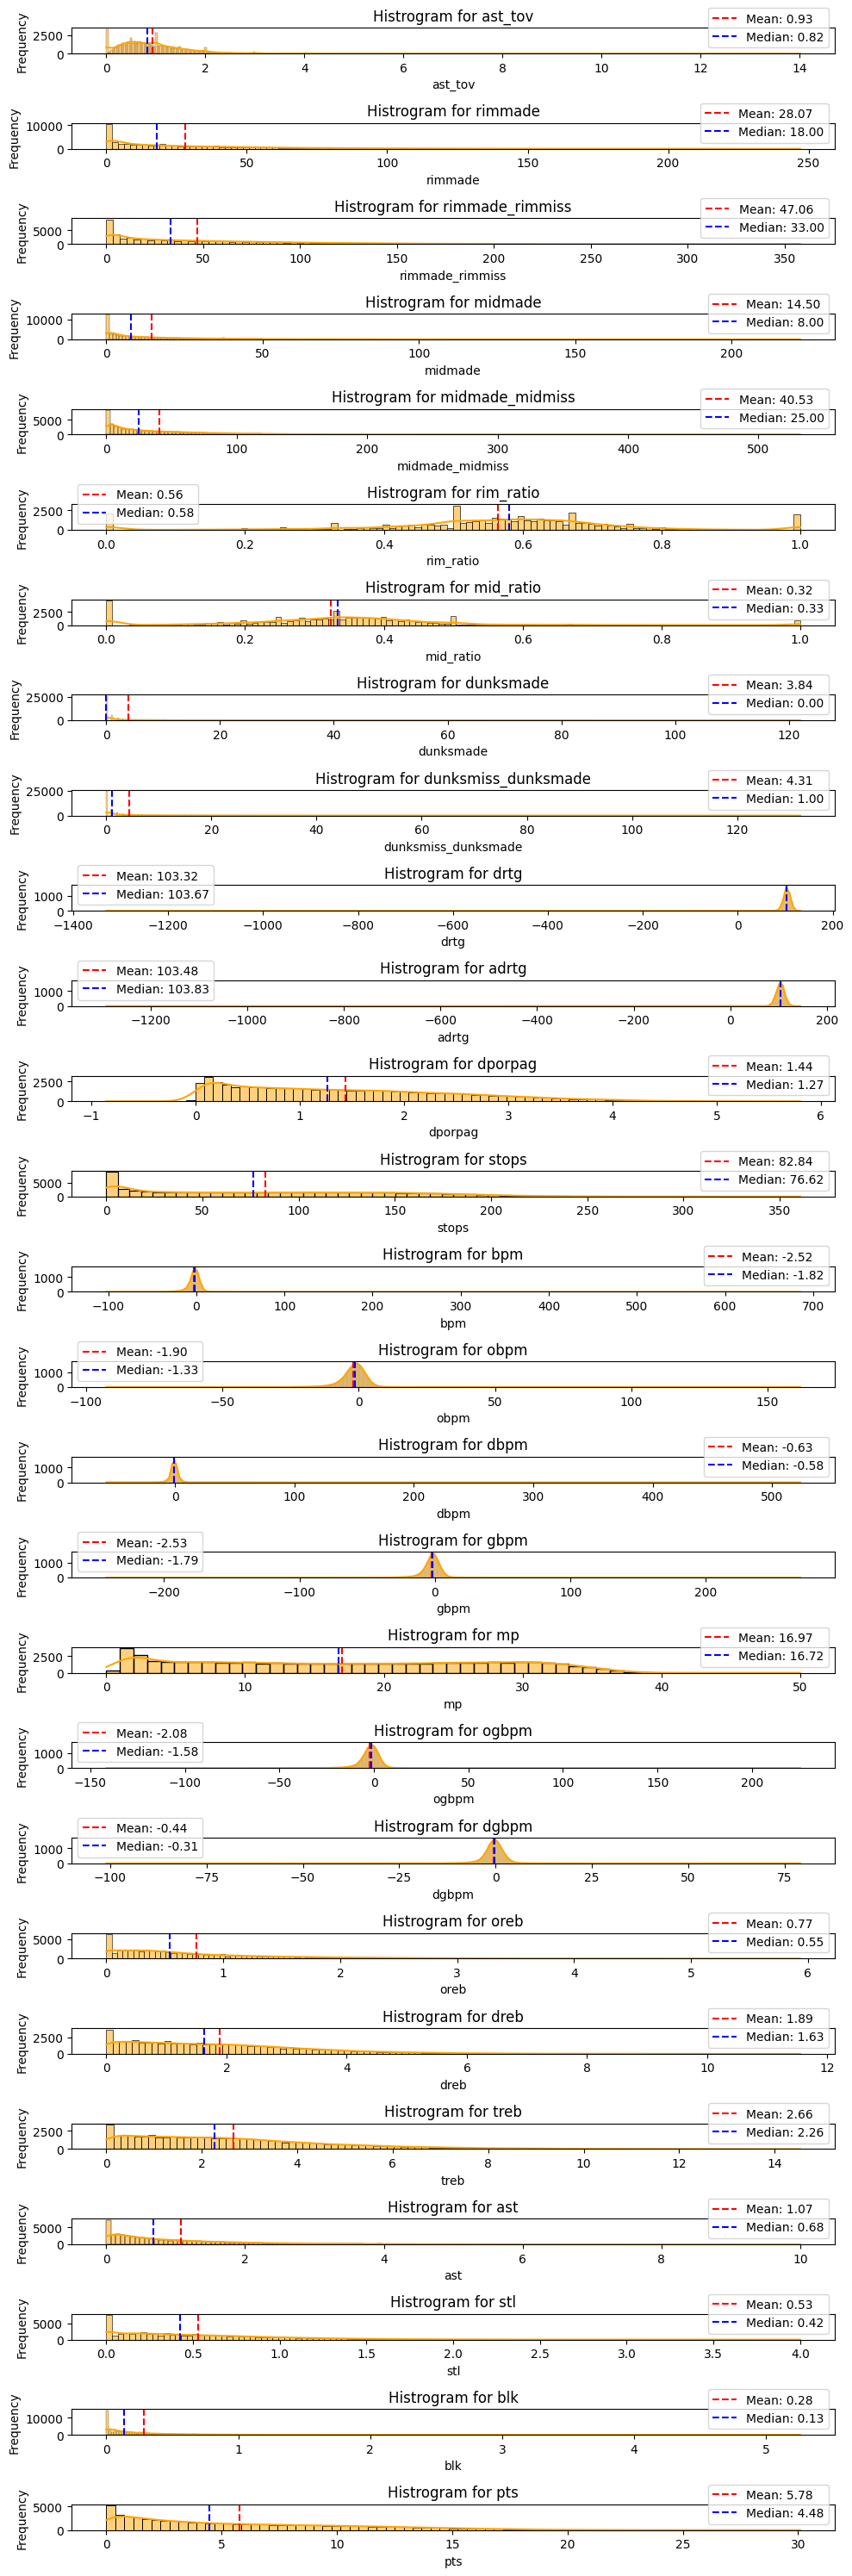

In [91]:
fig, axes = plt.subplots(nrows=len(missing_columns), figsize=(10, 30))

for i,c in enumerate(missing_columns):
    sns.histplot(df_cleaned_train[c], ax=axes[i], kde=True, color='orange')
    
    mean = df_cleaned_train[c].mean()
    median = df_cleaned_train[c].median()
    
    axes[i].axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
    axes[i].axvline(median, color='blue', linestyle='--', label=f"Median: {median:.2f}")
    
    axes[i].set_title(f'Histrogram for {c}')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [85]:
df_cleaned_train = df_cleaned_train.fillna(df_cleaned_train.median())
df_cleaned_test = df_cleaned_test.fillna(df_cleaned_test.median())

In [86]:
df_cleaned_train['drafted'].dtype

dtype('float64')

In [87]:
df_cleaned_train['drafted'] = df_cleaned_train['drafted'].astype('category')

In [88]:
df_cleaned_train['drafted'].value_counts(normalize=True)

drafted
0.0    0.990443
1.0    0.009557
Name: proportion, dtype: float64

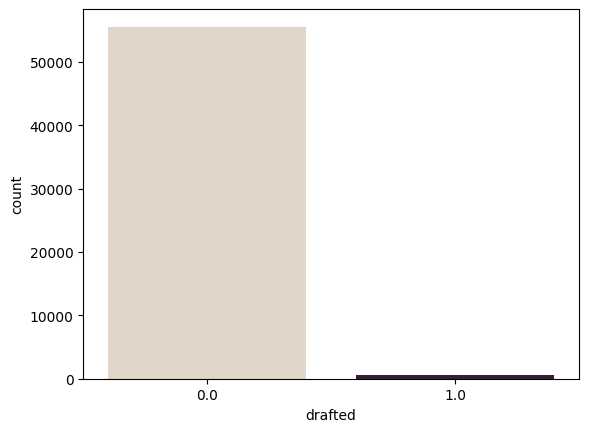

In [89]:
sns.countplot(x='drafted', data=df_cleaned_train, palette=palette)
plt.show()

In [90]:
df_cleaned_train.to_csv('../data/processed/df_cleaned_train.csv', index=False)
df_cleaned_test.to_csv('../data/processed/df_cleaned_test.csv', index=False)

### SMOTE

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
y_train = df_cleaned_train.pop('drafted')
X_train = df_cleaned_train

In [96]:
X_test = df_cleaned_test

In [97]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)

In [98]:
smote = SMOTE(random_state=42)

In [99]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Standard Scaling

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
num_cols.remove('drafted')

In [104]:
scaler = StandardScaler()
scaler.fit(X_train_smote[num_cols])

StandardScaler()

In [105]:
X_train_smote_scaled = X_train_smote.copy()
X_train_smote_scaled[num_cols] = scaler.transform(X_train_smote[num_cols])

In [107]:
X_test_smote_scaled = X_test.copy()
X_test_smote_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [111]:
X_train_smote_scaled.to_csv('../data/processed/X_train_smote.csv', index=False)
X_test_smote_scaled.to_csv('../data/processed/X_test_smote.csv', index=False)